#**GRIP Task 3: Exploratory Data Analysis - Terrorism**

###**Name: SOUGATA KHAN**

###We have to perform Exploratory Data Analysis on the dataset 'Global Terrorism'.

**Importing libraries and visualising the data**


We first load the libraries required for our work and then read the dataset.

In [41]:
#Importing libraries and visualising the data
#Fortunately, we do not need to load any other library for this work
df<-read.csv('/globalterrorism.csv',header=T)#reading the dataset
dim(df)#dimensions of the dataset
length(is.na(df))#number of 'na' values
names(df)

[1] 181691    135

[1] 24528285

[1] "eventid"            "iyear"              "imonth"            
  [4] "iday"               "approxdate"         "extended"          
  [7] "resolution"         "country"            "country_txt"       
 [10] "region"             "region_txt"         "provstate"         
 [13] "city"               "latitude"           "longitude"         
 [16] "specificity"        "vicinity"           "location"          
 [19] "summary"            "crit1"              "crit2"             
 [22] "crit3"              "doubtterr"          "alternative"       
 [25] "alternative_txt"    "multiple"           "success"           
 [28] "suicide"            "attacktype1"        "attacktype1_txt"   
 [31] "attacktype2"        "attacktype2_txt"    "attacktype3"       
 [34] "attacktype3_txt"    "targtype1"          "targtype1_txt"     
 [37] "targsubtype1"       "targsubtype1_txt"   "corp1"             
 [40] "target1"            "natlty1"            "natlty1_txt"       
 [43] "targtype2"          "targtype2_txt"      "targsubtype2"      
 [46] "targsubtype2_txt"   "corp2"              "target2"           
 [49] "natlty2"            "natlty2_txt"        "targtype3"         
 [52] "targtype3_txt"      "targsubtype3"       "targsubtype3_txt"  
 [55] "corp3"              "target3"            "natlty3"           
 [58] "natlty3_txt"        "gname"              "gsubname"          
 [61] "gname2"             "gsubname2"          "gname3"            
 [64] "gsubname3"          "motive"             "guncertain1"       
 [67] "guncertain2"        "guncertain3"        "individual"        
 [70] "nperps"             "nperpcap"           "claimed"           
 [73] "claimmode"          "claimmode_txt"      "claim2"            
 [76] "claimmode2"         "claimmode2_txt"     "claim3"            
 [79] "claimmode3"         "claimmode3_txt"     "compclaim"         
 [82] "weaptype1"          "weaptype1_txt"      "weapsubtype1"      
 [85] "weapsubtype1_txt"   "weaptype2"          "weaptype2_txt"     
 [88] "weapsubtype2"       "weapsubtype2_txt"   "weaptype3"         
 [91] "weaptype3_txt"      "weapsubtype3"       "weapsubtype3_txt"  
 [94] "weaptype4"          "weaptype4_txt"      "weapsubtype4"      
 [97] "weapsubtype4_txt"   "weapdetail"         "nkill"             
[100] "nkillus"            "nkillter"           "nwound"            
[103] "nwoundus"           "nwoundte"           "property"          
[106] "propextent"         "propextent_txt"     "propvalue"         
[109] "propcomment"        "ishostkid"          "nhostkid"          
[112] "nhostkidus"         "nhours"             "ndays"             
[115] "divert"             "kidhijcountry"      "ransom"            
[118] "ransomamt"          "ransomamtus"        "ransompaid"        
[121] "ransompaidus"       "ransomnote"         "hostkidoutcome"    
[124] "hostkidoutcome_txt" "nreleased"          "addnotes"          
[127] "scite1"             "scite2"             "scite3"            
[130] "dbsource"           "INT_LOG"            "INT_IDEO"          
[133] "INT_MISC"           "INT_ANY"            "related"

**Exploratory Data Analysis**

We now move forward to our Exploratory Data Analysis part.

####Attacks by Year:

The below chart describes the number of attacks by year

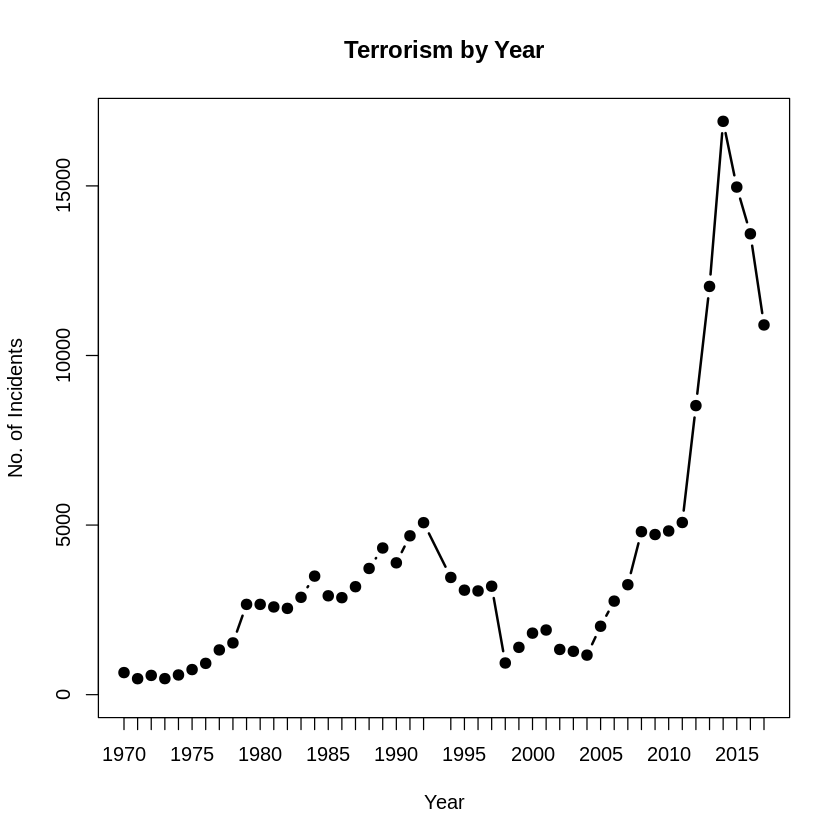

In [42]:
attack_year<-table(df$iyear)
plot(attack_year,type='b',main='Terrorism by Year',
     xlab='Year',ylab='No. of Incidents',pch=19)

From the above chart, we observe that no. of attacks increased over the years since 1970 till the early 90s. However, there was a decline in the no. of attacks till the late 90s. Moving further, we obseve a steep incline in the no. of attacks since the late 90s till 2014(which also has the highest number of attacks in a calender year) and we note a decline in the no. of attacks since then.

####Type of Attack by Year:


We next look at the frequency of attacks over the years by their type



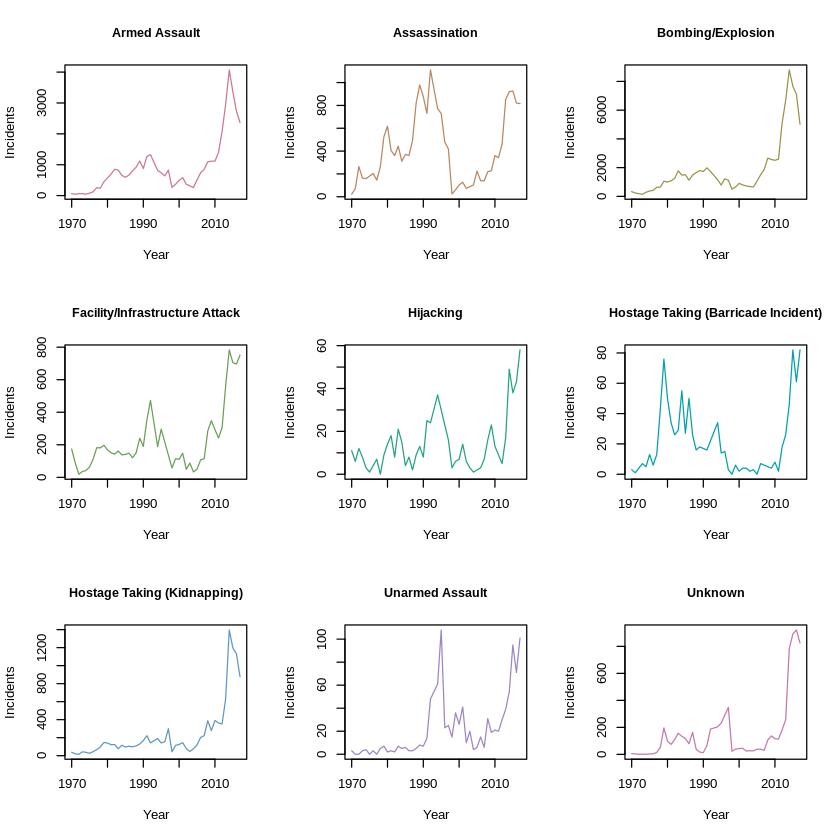

In [43]:
type_year<-cbind(unique(df$iyear),table(df$iyear,df$attacktype1_txt))
type_year<-type_year[order(type_year[,1]),]
par(mfrow=c(3,3))
for(i in 2:ncol(type_year))
{
  plot(x=type_year[,1],y=type_year[,i],main=colnames(type_year)[i],
       xlab='Year',ylab='Incidents',type='l',cex.main=0.95,
       col=hcl.colors(9,'dark 2')[i-1])
}

We notice some interesting patterns in the type of attacks over the years. Armed Assault saw an overall growth till the mid 90s with the no. of cases dipping before rising steeply from the mid 2000s till 2014 and then declining again. Assassination was very popular since the beginning with the no. of cases rising in the till the early 90s before this type of attack faced a drop. However, since the late 90s, the no. of cases corresponding to this type of attack increased (almost) exponentially till the mid 2010s. Bombings/Explosions were somewhat common till the mid 2000s before gaining popularity as the no. of cases soared up till the mid 2010s. It has seen a decline since then. Facility/Infrastructure Attacks gained popularity just before the 90s and then again since the mid 2000s. Hijacking has an uneven history with sometimes gaining popularity and sometimes not. Hostage Taking (Barricade Incident) was initially a very common form of attack until the mid 90s when these incidents were significantly reduced. However, since 2010, the no. or these events rose at an increasing rate. Hostage Taking (Kidnapping) was initially a not-so-common form of attack. However, it saw a steady increase and the no. of cases leaped at a tremendous pace since the early 2000s. Unarmed Assault was very common in the mid 90s before subsiding in the 2000s. However, since 2010, the no. of cases of this type is on the rise. Unknown attacks gained popularity since the 2010s and has been on the rise since then.

####Attack by Region:


We next look at the frequency of attacks based on regions



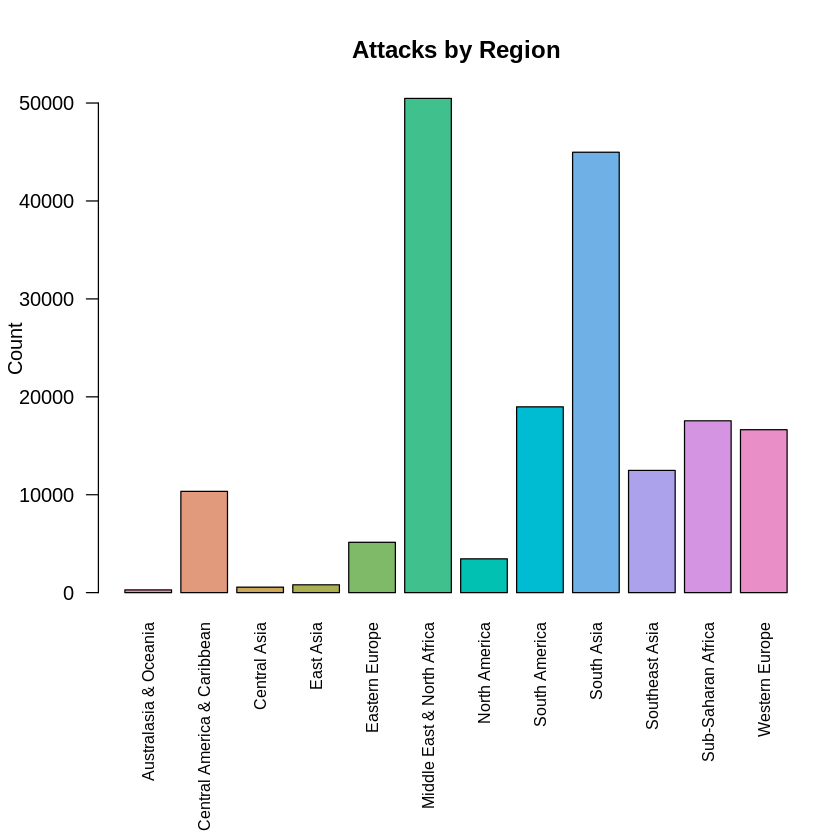

In [44]:
attack_reg<-table(df$region_txt)
par(mar=c(10,4,4,1)+.1)
barplot(attack_reg,las=2,cex.names=0.8,
        col=hcl.colors(nrow(attack_reg),'set 2'),
        ylab='Count',main='Attacks by Region')

We find that the most affected region by terrorism in the world is Middle East & North Africa followed closely by South Asia. The third most affected region is South America, however, there's a big gap between the first second and the third.

####Target type:


We next look at the most common targets of the terrorists by type



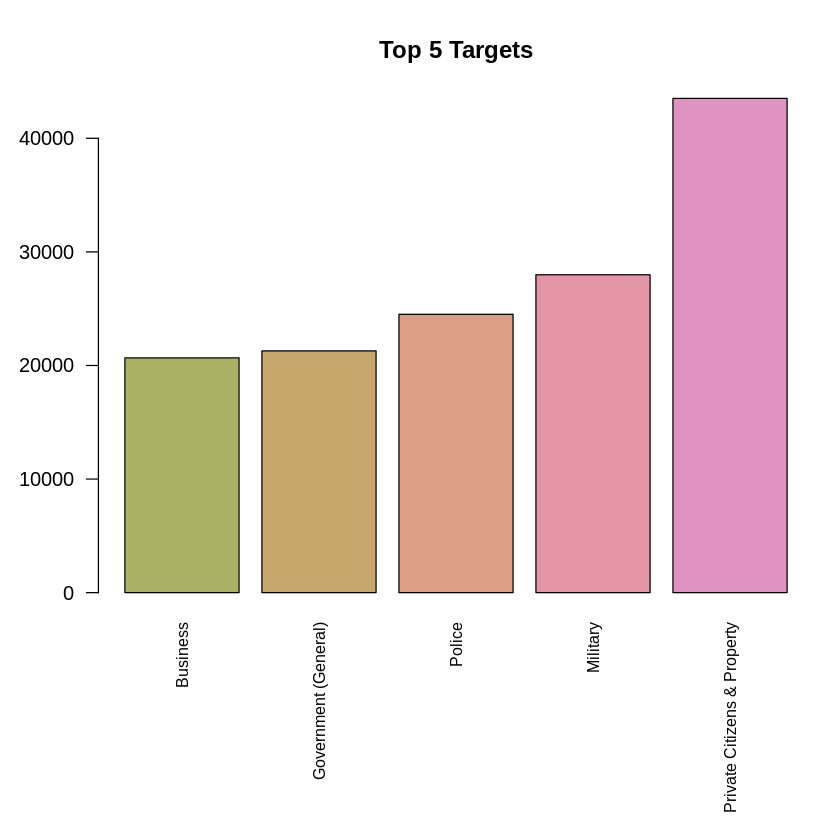

In [45]:
par(mar=c(10,4,4,1)+.1)
targ_type<-table(df$targtype1_txt)
max_targ_type<-tail(sort(targ_type),5)
barplot(max_targ_type,col=hcl.colors(5,'warm'),las=2,
        cex.names=0.8,main='Top 5 Targets')

We observe that Private Citizens & Properties is the most popular target type for the terrorists. However, violence against Military, Police, Government(General) and Business are also not uncommon.

####Attacks by Region over the years:


We now look at the attacks over the years on various regions



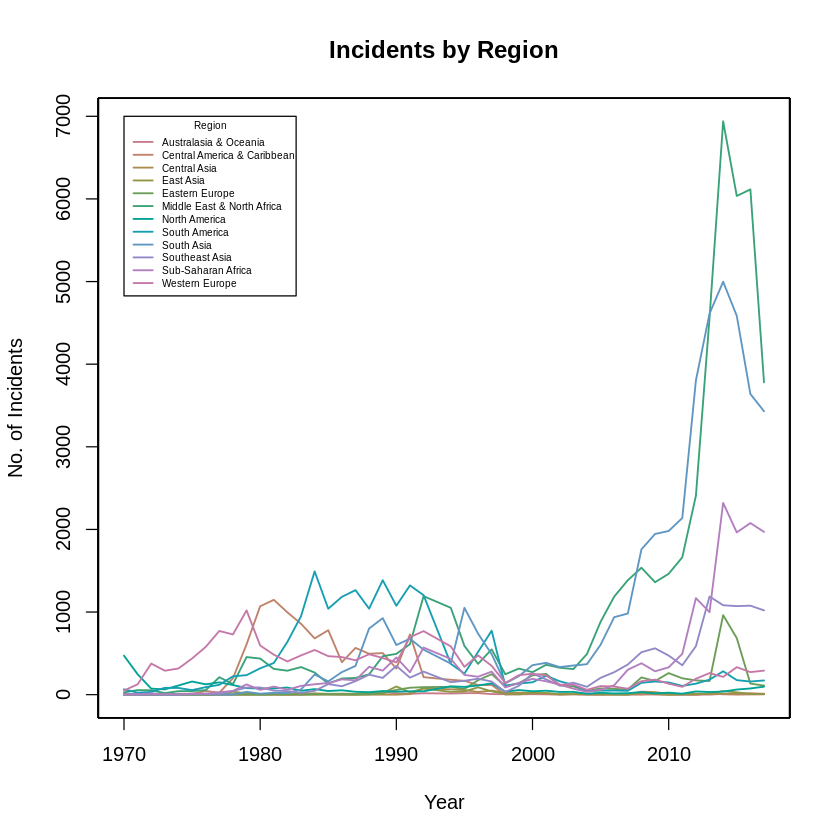

In [46]:
reg_year<-table(df$region_txt,df$iyear)
plot(x=colnames(reg_year),y=reg_year[1,],type='l',lwd=1.5,
     ylim=c(min(reg_year),max(reg_year)),xlim=c(1970,2017),
     col=hcl.colors(nrow(reg_year),'dark 2')[1],
     xlab='Year',ylab='No. of Incidents',
     main='Incidents by Region')
for(i in 2:nrow(reg_year))
{
  par(new=T)
  plot(x=colnames(reg_year),y=reg_year[i,],type='l',lwd=1.5,
       ylim=c(min(reg_year),max(reg_year)),xlim=c(1970,2017),
       xaxt='n',yaxt='n',xlab=NA,ylab=NA,
       col=hcl.colors(nrow(reg_year),'dark 2')[i])
}
legend(x=1970,y=7000,rownames(reg_year),lwd=1.5,
       col=hcl.colors(nrow(reg_year),'dark 2'),
       cex=0.5,title='Region')

We notice an interesting trend of attacks in various regions over the years. While initially, South America saw more unrests in the period between 1980 to 2000, South Asia and Middle East & North Africa saw a huge rise in terror activities. We also notice that in the year 2014, there has been a global unrest, which cause every single region to have a spike in the annual uprisings.

####Affected Country:

The below graph shows the most attacked countries



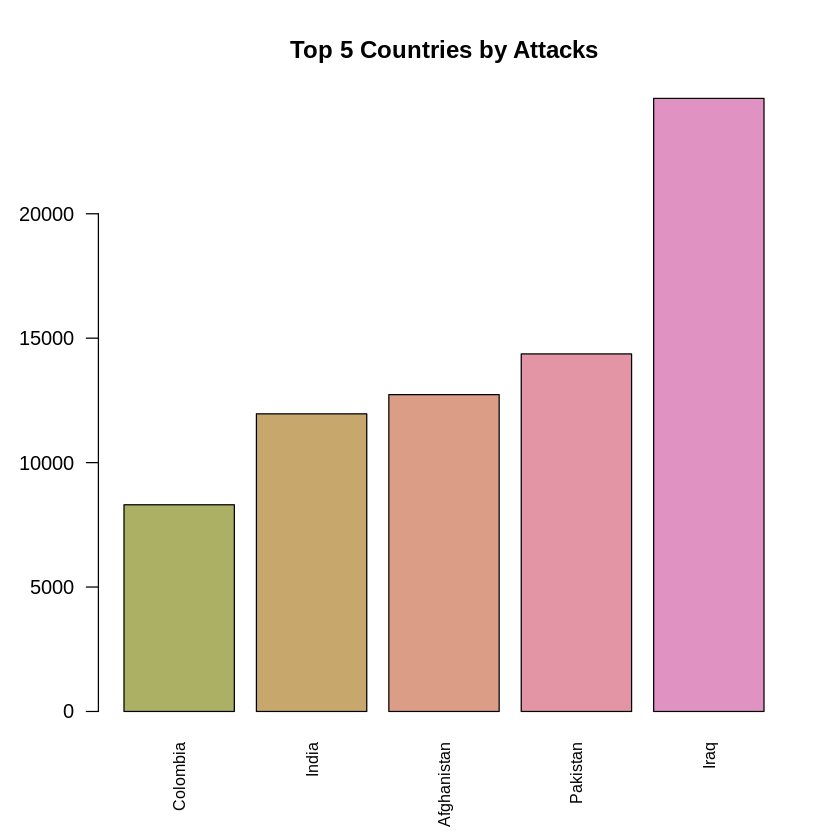

In [47]:
country<-table(df$country_txt)
max_country<-tail(sort(country),5)
barplot(max_country,col=hcl.colors(5,'warm'),
        las=2,cex.names=0.8,main='Top 5 Countries by Attacks')

We find that Iraq is the most affected country in the world. It has a huge gap with Pakistan which is placed second in the list.



####Weapons Used:

In the below given graph, we aim to look at the weapons used by the terrorists to carry out the attacks



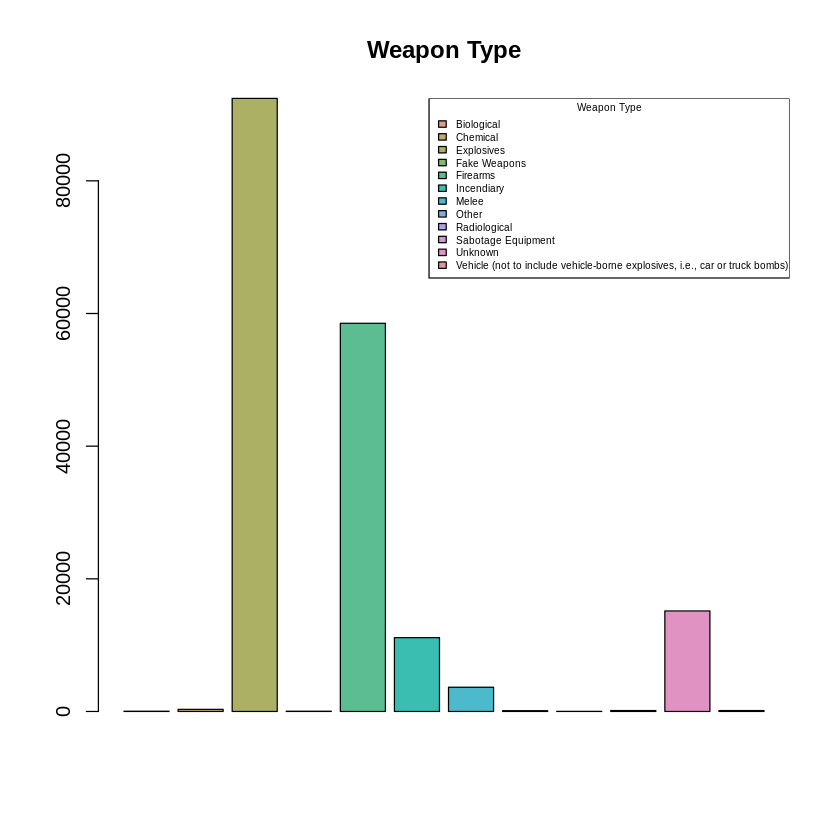

In [48]:
weapon<-table(df$weaptype1_txt)
barplot(weapon,xaxt='n',col=hcl.colors(length(unique(df$weaptype1_txt)),'dynamic'),
        main='Weapon Type')
legend('topright',rownames(weapon),
       fill=hcl.colors(length(unique(df$weaptype1_txt)),'dynamic'),
       cex=0.5,title='Weapon Type')

We note from the graph that the most common weapon used was Explosives, followed by Firearms. These two itself consisted of the max percentage of weapons used for the attacks.

####Casualties by Year:


Finally, we look at the casualties by year globally



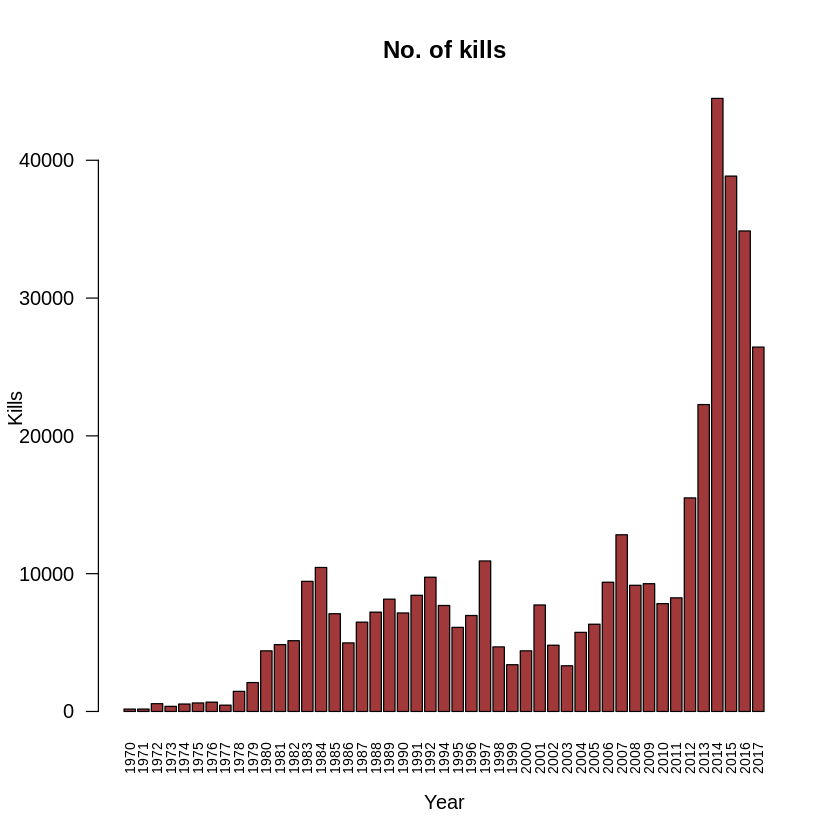

In [49]:
df[is.na(df$nkill),]$nkill<-0
year_kill<-tapply(df$nkill,df$iyear,sum)
year_kill<-as.table(year_kill)
barplot(year_kill,las=2,cex.names=0.7,main='No. of kills',
        xlab='Year',ylab='Kills',col='#a1383a')

We find that in the year 2014, maximum number of deaths occurred across the world. This is in keeping with the fact that there was an increase in global terrorism in that particular year.

Further, looking at this graph, we can relate it to the graph of the Attacks by Year. We proceed to further find a correlation between the number of deaths and the number of attacks in a calendar year.

####Correlation

We find the correlation coefficient between Casualties and No. of Attacks

In [50]:
attack_kill<-cbind(year_kill,attack_year)
atk_cor<-cor(attack_kill)
atk_cor
atk_cor[lower.tri(atk_cor,diag=T)]<-0
max(atk_cor)

,year_kill,attack_year
year_kill,1.000000,0.966005
attack_year,0.966005,1.000000


[1] 0.966005

We observe that the correlation coefficient is pretty high, which implies that the there is a direct relation between the Casualties and No. of Attacks in a calendar year.



####Database Source:


The below table lists the database source



In [51]:
source<-as.data.frame(table(df$dbsource))
colnames(source)<-c('Source','Freq')
source

Source,Freq
<fct>,<int>
Anti-Abortion Project 2010,186
Armenian Website,40
CAIN,1588
CBRN Global Chronology,46
CETIS,16163
Disorders and Terrorism Chronology,5
Eco Project 2010,147
Hewitt Project,1005
Hijacking DB,54
